LASSO AND RIDGE REGULARIZATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
df = pd.read_excel("/Users/ayush/Desktop/Learning/NOTEBOOK/house_price_dataset.xlsx")
df.head()

,bedrooms,bathrooms,living_sqft,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,year_renovated,price
0,7,2.2,3338,12023,1,0,4,5,1088,1888,2005,2005,1281662
1,4,1.4,1650,1667,2,1,2,2,2512,1,1985,2015,905755
2,5,2.8,2431,10337,2,1,1,2,2047,224,1994,1982,1085557
3,7,1.9,1512,14659,2,0,0,1,794,800,1972,2002,679954
4,3,2.7,2164,4719,2,0,2,2,2485,1768,1996,1997,1131353


In [5]:
df.corr

<bound method DataFrame.corr of      bedrooms  bathrooms  living_sqft  ...  year_built  year_renovated    price
0           7        2.2         3338  ...        2005            2005  1281662
1           4        1.4         1650  ...        1985            2015   905755
2           5        2.8         2431  ...        1994            1982  1085557
3           7        1.9         1512  ...        1972            2002   679954
4           3        2.7         2164  ...        1996            1997  1131353
..        ...        ...          ...  ...         ...             ...      ...
195         6        2.6         3830  ...        1991            1991  1714056
196         4        2.7         3203  ...        2021            2012  1288669
197         2        4.0          970  ...        1973            1986   585329
198         2        2.0         1853  ...        1998            1999  1072815
199         5        1.7         3283  ...        1975            2012  1030470

[200 ro

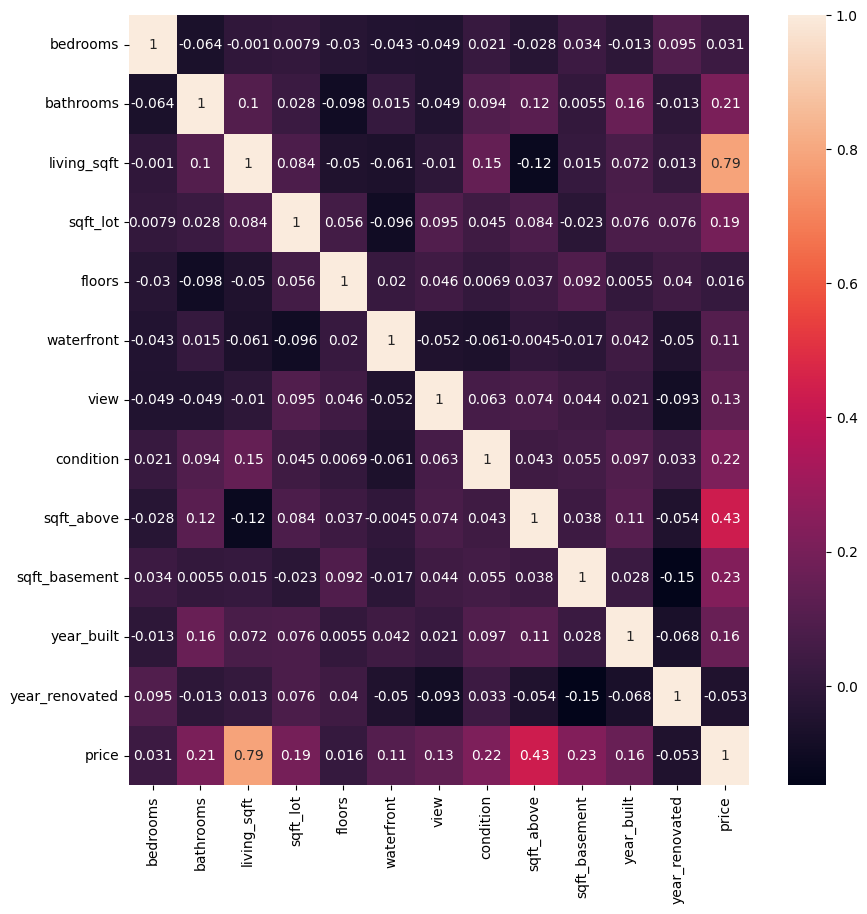

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()


In [ ]:
x =df.iloc[:,:-1]
y=df["price"]


In [12]:
sc = StandardScaler()
sc.fit(x)
sc.transform(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x

,bedrooms,bathrooms,living_sqft,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,year_renovated
0,1.416577,-0.679798,0.378622,0.282430,-1.0,-0.922958,1.498240,1.373015,-1.097354,1.502563,0.981618,0.144913
1,-0.085095,-1.386541,-1.007561,-1.723693,1.0,1.083473,0.074734,-0.707311,0.358912,-1.602239,0.017120,0.186000
2,0.415462,-0.149741,-0.366205,-0.044175,1.0,1.083473,-0.637019,-0.707311,-0.116624,-1.235323,0.451144,0.050413
3,1.416577,-0.944826,-1.120886,0.793066,1.0,-0.922958,-1.348772,-1.400753,-1.398016,-0.287593,-0.609804,0.132587
4,-0.585652,-0.238084,-0.585465,-1.132472,1.0,-0.922958,0.074734,-0.707311,0.331301,1.305119,0.547594,0.112043
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.916020,-0.326427,0.782651,0.510240,1.0,1.083473,-1.348772,-0.013869,1.082955,0.347517,0.306469,0.087391
196,-0.085095,-0.238084,0.267760,1.193864,1.0,1.083473,0.786487,1.373015,-0.969522,0.456111,1.753216,0.173673
197,-1.086209,0.910373,-1.565975,-0.547643,-1.0,-0.922958,0.074734,-0.707311,-0.742491,-1.176090,-0.561579,0.066848
198,-1.086209,-0.856484,-0.840857,1.229702,-1.0,-0.922958,-0.637019,0.679573,0.296530,0.818091,0.644044,0.120261


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

LINEARREGRESSION

In [25]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100

99.14369407966652

In [48]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))



875888786.1207558
25660.007779003652
29595.418329882683


In [26]:
lr.coef_

array([ 14552.03938073,  17462.54407544, 246518.26009965,  26788.46889721,
         3765.71851001,  52246.4403327 ,  29601.21267108,  15537.93808083,
       146444.45382755,  57213.9644546 ,   3793.11692975,   -932.8903037 ])

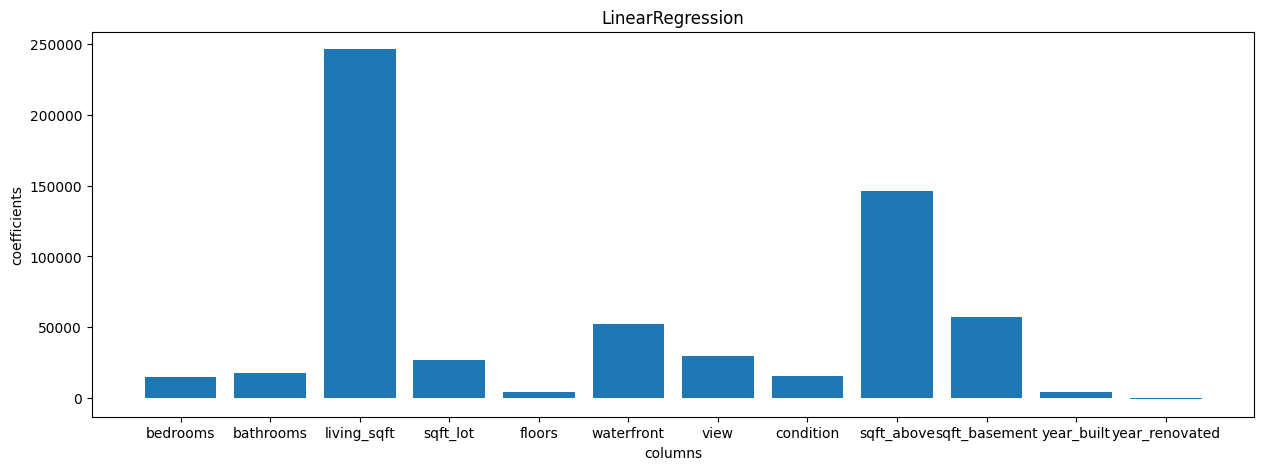

In [36]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.title("LinearRegression")
plt.show()

LASSO (L1)

In [40]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

99.14369394229846

In [49]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

875888926.6302878
25660.005116076703
29595.420703721848


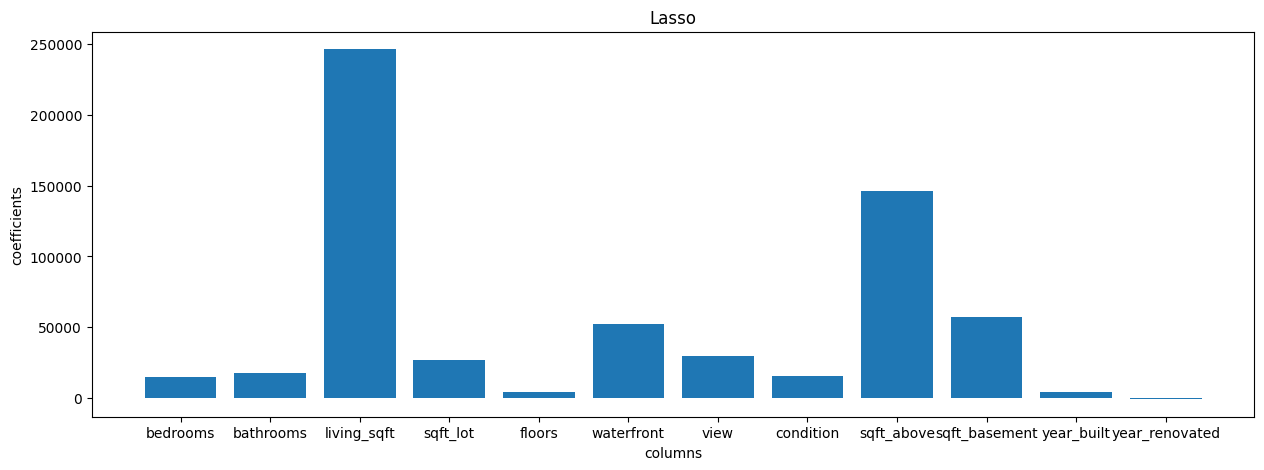

In [41]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.title("Lasso")
plt.show()

RIDGE

In [43]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

98.58004307354213

In [50]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

1452429930.852948
32109.20644426478
38110.75872838204


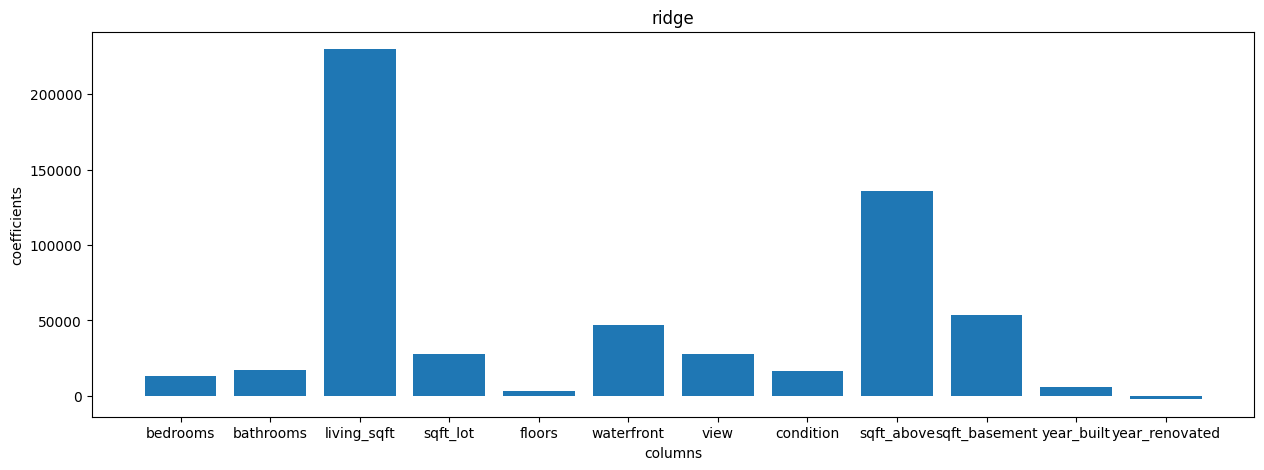

In [44]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.title("ridge")
plt.show()

In [54]:
de = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"ridge":ri.coef_})

In [55]:
de

,col_name,LinearRegression,Lasso,ridge
0,bedrooms,14552.039381,14552.030729,13007.205920
1,bathrooms,17462.544075,17462.534341,17040.136645
2,living_sqft,246518.260100,246518.253162,229870.776525
3,sqft_lot,26788.468897,26788.462294,27619.818537
4,floors,3765.718510,3765.707208,3455.081951
5,waterfront,52246.440333,52246.428879,46732.912342
6,view,29601.212671,29601.203143,27625.512590
7,condition,15537.938081,15537.929928,16496.734265
8,sqft_above,146444.453828,146444.447696,135519.968426
9,sqft_basement,57213.964455,57213.957206,53491.702103
